In [1]:
!nvidia-smi

Tue Dec 23 05:01:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO
print("yolov8 imported")

yolov8 imported


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iQELH9Gp2rYQgPkbvU0I")
project = rf.workspace("al-imtpq").project("document-parser-obcdc")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
!cat document-parser-4/data.yaml

names:
- equation
- figure
- paragraph
nc: 3
roboflow:
  license: CC BY 4.0
  project: document-parser-obcdc
  url: https://universe.roboflow.com/al-imtpq/document-parser-obcdc/dataset/4
  version: 4
  workspace: al-imtpq
test: ../test/images
train: ../train/images
val: ../valid/images


In [6]:
model = YOLO("yolov8n.pt")

In [17]:
!rm -r runs
!rm yolo*

rm: cannot remove 'runs': No such file or directory


In [18]:
model.train(
    data="document-parser-4/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="parser-yolov8"
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=document-parser-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/parser-yolov8/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=parser-yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780511e512b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [19]:
from ultralytics import YOLO
import os

# Load the best trained YOLOv8 model
model = YOLO('/content/runs/detect/parser-yolov8/weights/best.pt')
print("Model loaded successfully.")

# Define the path to the Predictables folder
predictables_path = '/content/document-parser-4/test/images'

# Perform predictions on images in the Predictables folder
results = model.predict(
    source=predictables_path,
    save=True,
    imgsz=640,
    name='predict'
)
print(f"Predictions saved to: runs/detect/predict")

Model loaded successfully.

image 1/6 /content/document-parser-4/test/images/1-Crystal-Imperfections_page-0009_jpg.rf.00aca08c375f09c7cb0aa8939820c500.jpg: 480x640 4 equations, 1 figure, 3 paragraphs, 8.9ms
image 2/6 /content/document-parser-4/test/images/1-Crystal-Imperfections_page-0017_jpg.rf.94d0f6ed64550137a4f44449a3c6d8d2.jpg: 480x640 1 figure, 1 paragraph, 6.7ms
image 3/6 /content/document-parser-4/test/images/1-Crystal-Imperfections_page-0026_jpg.rf.0dca40ea6551c4111a1151e47d989700.jpg: 480x640 1 figure, 3 paragraphs, 8.0ms
image 4/6 /content/document-parser-4/test/images/2-Electrical-Conductivity_page-0002_jpg.rf.bd98648f602879ae278d447a824a4af8.jpg: 480x640 2 equations, 3 paragraphs, 6.3ms
image 5/6 /content/document-parser-4/test/images/2-Electrical-Conductivity_page-0029_jpg.rf.ab52dd44c649c449bfef880031902076.jpg: 480x640 6 equations, 3 paragraphs, 6.5ms
image 6/6 /content/document-parser-4/test/images/2-Electrical-Conductivity_page-0037_jpg.rf.3b8fb8c242692342b82c92eb67ba

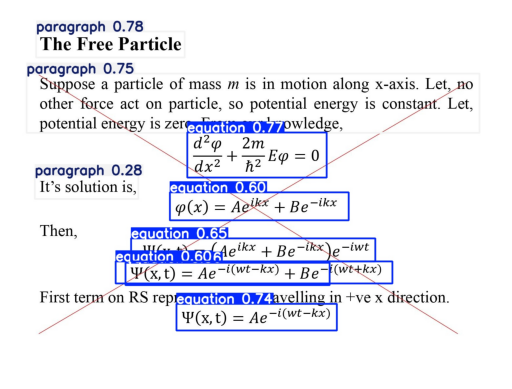

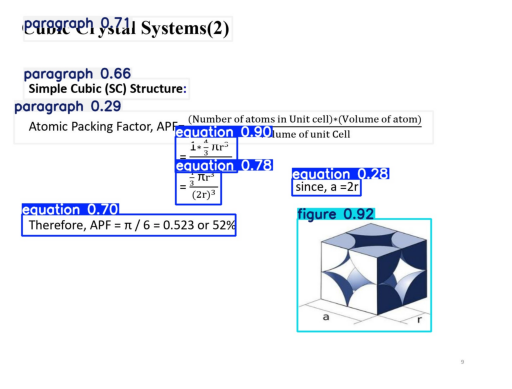

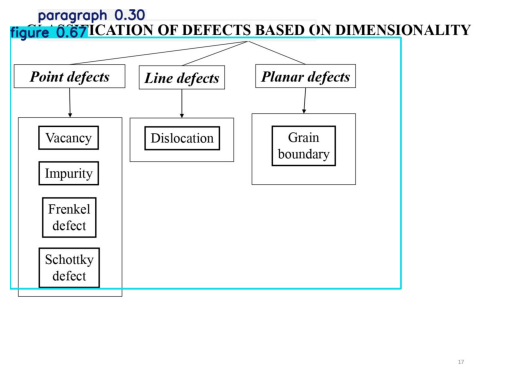

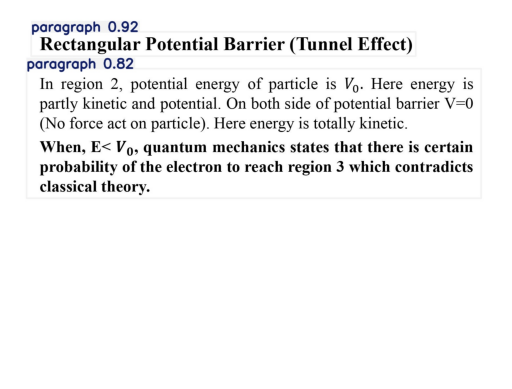

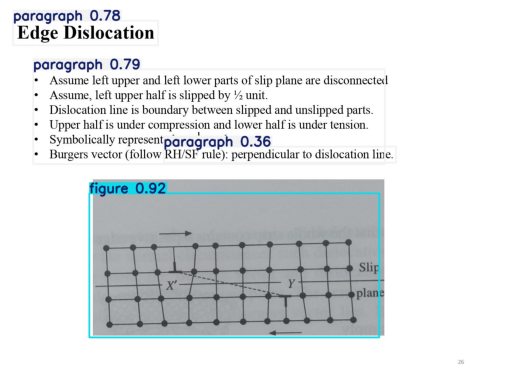

In [20]:
import os
from PIL import Image
import matplotlib.pyplot as plt

pred_dir = "/content/runs/detect/predict"
images = os.listdir(pred_dir)[:5]  # show first 5

for img in images:
    image = Image.open(os.path.join(pred_dir, img))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
